In [2]:
import pandas as pd
import numpy as np
import awpy as Demoparser
import matplotlib.pyplot as plt
import json
import os
import scipy.stats as st
import seaborn as sns
import math

In [3]:
games = []
for jsn in os.listdir("C:/Users/Wessel/Documents/DataScienceDemos/JSON"):
    game = json.load(open("C:/Users/Wessel/Documents\DataScienceDemos/JSON/{}".format(jsn)))
    games.append(game)   

In [4]:
#generate list of unique maps in pool
maps = []
for game in games:
    if game['mapName'] not in maps:
        maps.append(game['mapName'])
print(maps)

['de_mirage', 'de_inferno', 'de_overpass', 'de_ancient', 'de_nuke', 'de_vertigo']


In [122]:
#init dict's of maps
map_dict_mouz = {}
map_dict_enemy = {}
avg_kills_mouz = {}
avg_kills_enemy = {}
stdef_map_dict_mouz = {}
stdef_map_dict_enemy = {}
conf_rate_kills = {}
win_dict = {}
loss_dict = {}
i=0
for k in maps:
    map_dict_mouz[maps[i]] = []
    map_dict_enemy[maps[i]] = []
    avg_kills_mouz[maps[i]] = []
    avg_kills_enemy[maps[i]] = []
    stdef_map_dict_mouz[maps[i]] = []
    stdef_map_dict_enemy[maps[i]] = []
    conf_rate_kills[maps[i]] = []
    win_dict[maps[i]] = 0
    loss_dict[maps[i]] = 0
    i += 1

In [123]:
#fill dict's wits mous kills per round
for game in games:
    i = 0
    for gameround in game['gameRounds']:
        number_of_kills = 0
        j = 0
        for kill in gameround['kills']:
            if kill['attackerTeam'] == "MOUZ":
                number_of_kills += 1
            j += 1  
        map_dict_mouz[game['mapName']].append(number_of_kills) 
        i += 1

#fill dict's with enemy klls per round
for game in games:
    i = 0
    for gameround in game['gameRounds']:
        number_of_kills = 0
        j = 0
        for kill in gameround['kills']:
            if kill['attackerTeam'] != "MOUZ":
                number_of_kills += 1
            j += 1  
        map_dict_enemy[game['mapName']].append(number_of_kills) 
        i += 1

In [124]:
i=0
for mp in map_dict_mouz:
    avg_kills_mouz[maps[i]] = (sum(map_dict_mouz[mp])/len(map_dict_mouz[mp]))
    i += 1
i=0
for mp in map_dict_enemy:
    avg_kills_enemy[maps[i]] = (sum(map_dict_enemy[mp])/len(map_dict_enemy[mp]))
    i += 1

print(avg_kills_mouz)
print(avg_kills_enemy)

{'de_mirage': 3.1454545454545455, 'de_inferno': 2.9432624113475176, 'de_overpass': 3.023529411764706, 'de_ancient': 3.4536082474226806, 'de_nuke': 2.9583333333333335, 'de_vertigo': 3.75}
{'de_mirage': 3.118181818181818, 'de_inferno': 3.120567375886525, 'de_overpass': 3.364705882352941, 'de_ancient': 3.0, 'de_nuke': 3.5833333333333335, 'de_vertigo': 3.125}


https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/5-differences-between-means-type-i-an

$ SE(diff) = \sqrt{ \frac {SD_1^2}{n_1} + \frac {SD_2^2}{n_2}} $


In [125]:
#get SD and n
i = 0
for k in map_dict_mouz:
    stdef_map_dict_mouz[maps[i]].append(np.mean(map_dict_mouz[maps[i]]))
    stdef_map_dict_mouz[maps[i]].append(np.std(map_dict_mouz[maps[i]]))
    stdef_map_dict_mouz[maps[i]].append(len(map_dict_mouz[maps[i]]))
    stdef_map_dict_enemy[maps[i]].append(np.mean(map_dict_enemy[maps[i]]))
    stdef_map_dict_enemy[maps[i]].append(np.std(map_dict_enemy[maps[i]]))
    stdef_map_dict_enemy[maps[i]].append(len(map_dict_enemy[maps[i]]))
    i+=1

print(stdef_map_dict_enemy)
print(stdef_map_dict_mouz)


{'de_mirage': [3.118181818181818, 1.6827024702263274, 110], 'de_inferno': [3.120567375886525, 1.694694170216819, 141], 'de_overpass': [3.364705882352941, 1.5556126753944088, 85], 'de_ancient': [3.0, 1.7468675942247531, 97], 'de_nuke': [3.5833333333333335, 1.1873172373979175, 24], 'de_vertigo': [3.125, 1.5360257159305635, 24]}
{'de_mirage': [3.1454545454545455, 1.7468744224854529, 110], 'de_inferno': [2.9432624113475176, 1.6706606738559011, 141], 'de_overpass': [3.023529411764706, 1.6941176470588237, 85], 'de_ancient': [3.4536082474226806, 1.686945745903733, 97], 'de_nuke': [2.9583333333333335, 1.8366447367111824, 24], 'de_vertigo': [3.75, 1.7380544678845176, 24]}


In [126]:
#get SE(diff)
i = 0
for k in stdef_map_dict_mouz:
    conf_rate_kills[maps[i]].append(math.sqrt((pow(stdef_map_dict_mouz.get(maps[i])[1], 2)/ stdef_map_dict_mouz.get(maps[i])[2]) + (pow(stdef_map_dict_enemy.get(maps[i])[1], 2)/ stdef_map_dict_enemy.get(maps[i])[2])))
    conf_rate_kills[maps[i]].append(stdef_map_dict_mouz.get(maps[i])[0]-stdef_map_dict_enemy.get(maps[i])[0])
    conf_rate_kills[maps[i]].append(conf_rate_kills.get(maps[i])[1]-1.96*conf_rate_kills.get(maps[i])[0])
    conf_rate_kills[maps[i]].append(conf_rate_kills.get(maps[i])[1]+1.96*conf_rate_kills.get(maps[i])[0])
    i += 1
conf_rate_kills

{'de_mirage': [0.23126250042360696,
  0.027272727272727337,
  -0.4260017735575423,
  0.480547228102997],
 'de_inferno': [0.2004090748666448,
  -0.17730496453900724,
  -0.570106751277631,
  0.21549682219961658],
 'de_overpass': [0.24946921059401006,
  -0.3411764705882354,
  -0.8301361233524951,
  0.14778318217602432],
 'de_ancient': [0.24657096469928252,
  0.4536082474226806,
  -0.02967084338791315,
  0.9368873382332743],
 'de_nuke': [0.4464203041562547,
  -0.625,
  -1.4999837961462592,
  0.2499837961462592],
 'de_vertigo': [0.47347159072347966,
  0.625,
  -0.3030043178180202,
  1.5530043178180202]}

In [139]:
i = 0
conf_low = []
conf_high = []
for k in conf_rate_kills:
    conf_high.append(conf_rate_kills[maps[i]][3])
    conf_low.append(conf_rate_kills[maps[i]][2])
    i += 1
print(conf_high)
print(conf_low)

[0.480547228102997, 0.21549682219961658, 0.14778318217602432, 0.9368873382332743, 0.2499837961462592, 1.5530043178180202]
[-0.4260017735575423, -0.570106751277631, -0.8301361233524951, -0.02967084338791315, -1.4999837961462592, -0.3030043178180202]


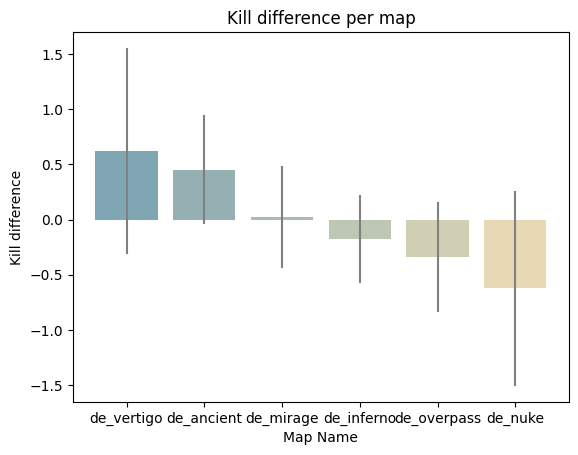

In [159]:
kill_dif = {}
i = 0
for k in avg_kills_mouz:
    kill_dif[maps[i]] = avg_kills_mouz[k]-avg_kills_enemy[k]
    i += 1

kill_dif = dict(sorted(kill_dif.items(), key=lambda x:x[1], reverse=True))

keys = list(kill_dif.keys())
values = list(kill_dif.values())
ax = sns.barplot(x=keys, y=values, palette="blend:#7AB,#EDA")
ax.set(xlabel='Map Name', ylabel='Kill difference', title='Kill difference per map')
ax
plt.plot([0, 0], [1.55, -0.3], color='grey')
plt.plot([1, 1], [0.94, -0.03], color='grey')
plt.plot([2, 2], [0.48, -0.43], color='grey')
plt.plot([3, 3], [0.21, -0.57], color='grey')
plt.plot([4, 4], [0.15, -0.83], color='grey')
plt.plot([5, 5], [0.25, -1.5], color='grey')

In [36]:
#fill dict's wits mouz wins per map
for game in games:
    i = 0
    for gameround in game['gameRounds']:         
        if(gameround['winningTeam'] == "MOUZ"):
            win_dict[game['mapName']] += 1
        else:
            loss_dict[game['mapName']] += 1
        i += 1
print(win_dict)
print(loss_dict)

{'de_mirage': 58, 'de_inferno': 69, 'de_overpass': 42, 'de_ancient': 58, 'de_nuke': 8, 'de_vertigo': 16}
{'de_mirage': 52, 'de_inferno': 72, 'de_overpass': 43, 'de_ancient': 39, 'de_nuke': 16, 'de_vertigo': 8}


In [ ]:
#error bar calculations


<Axes: >

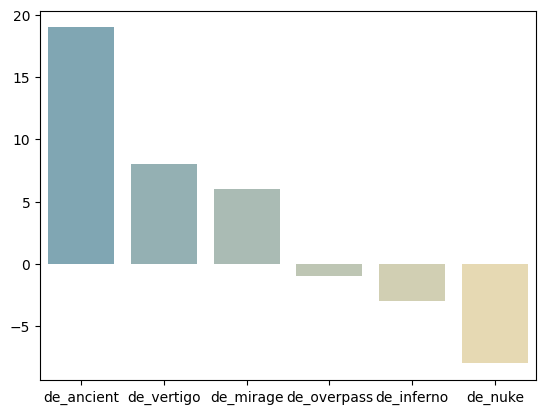

In [11]:
win_dif = {}
i = 0
for k in win_dict:
    win_dif[maps[i]] = win_dict[k]-loss_dict[k]
    i += 1

win_dif = dict(sorted(win_dif.items(), key=lambda x:x[1], reverse=True))

keys = list(win_dif.keys())
values = list(win_dif.values())
sns.barplot(x=keys, y=values, palette="blend:#7AB,#EDA")